# Computer Vision in Python

Spring 2022

Note: This notebook is for Google Colab. Change the Colab runtime to GPU or TPU


In [ ]:
# Install fastai
!pip install fastai --upgrade;

In [2]:
# Load libraries
import re

import numpy as np
import pandas as pd

from fastai.vision.all import *

from google.colab import drive
from google.colab import files

import warnings
warnings.filterwarnings('ignore')

set_seed(1000)

## Load Data

In [3]:
# Connect to Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Get image files in data folder
files = get_image_files('drive/MyDrive/data/weather')
len(files)

872

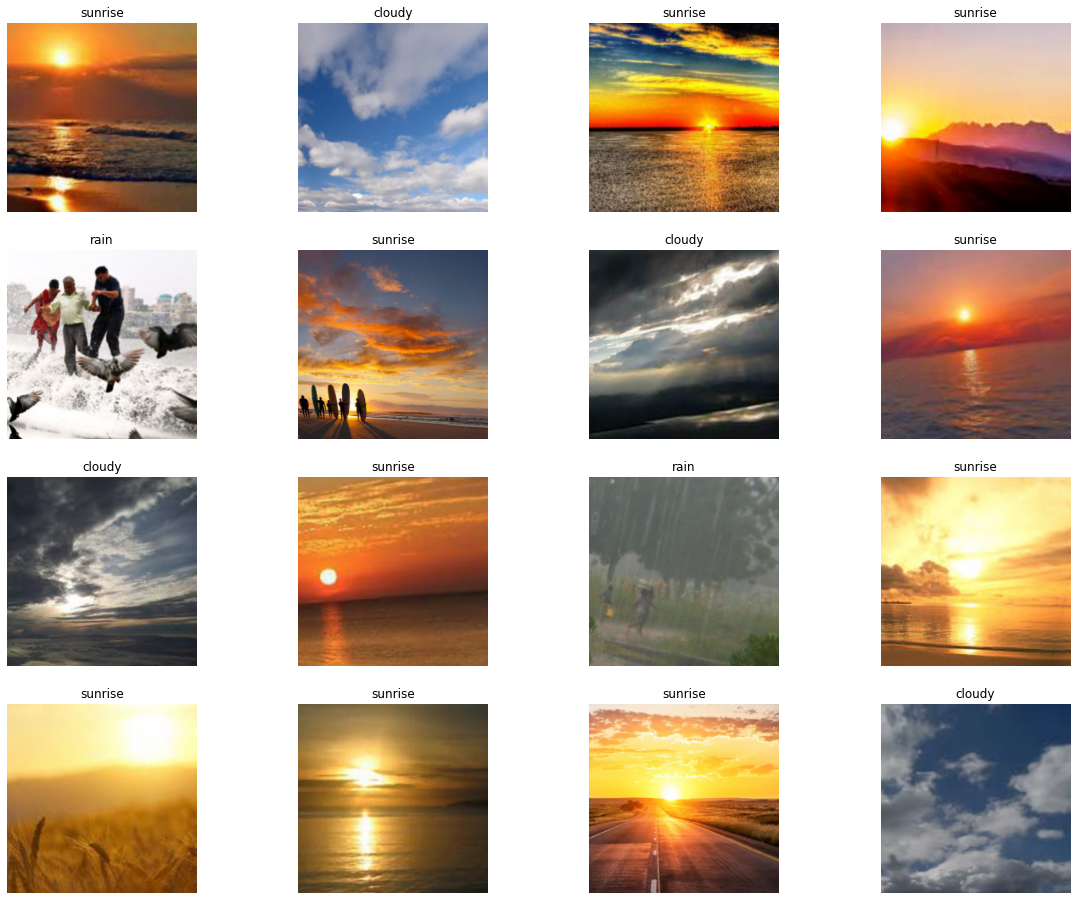

In [5]:
# Create data loaders
pattern = r'^([^\d]*)'

dls = ImageDataLoaders.from_name_re('data', files, pattern,
                                    item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))
dls.show_batch(max_n=16, figsize=(20, 16))

## Tune a Pre-Trained Model

In [6]:
# Resnet34 is a 34-layer convolutional neural network pretrained on ImageNet
# Image input size is 224x224x3
# Parameters roughly 20M
learn = cnn_learner(dls, resnet34, metrics=accuracy)

In [ ]:
# Assess potential learning rates
learn.lr_find()

In [8]:
# Fine tune using the suggested learning rate
learn.fine_tune(1, 8e-4)

epoch,train_loss,valid_loss,accuracy,time
0,1.673666,0.254372,0.919540,00:13


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
0,0.426487,0.075737,0.988506,00:13


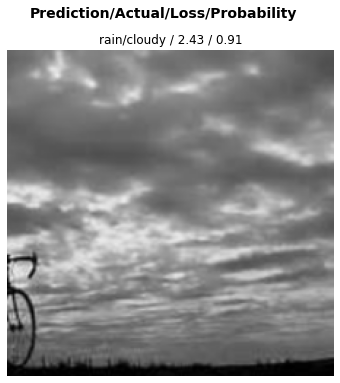

In [9]:
# Show misses
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(1, figsize=(7.5, 6))